In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [196]:
#from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
a=[1,2,3,4,5,7,8,4]
b=[10,2,.3,4,5,.7,.8,4.4]
data=pd.DataFrame(a,b)
c=np.column_stack([a,b])
data=pd.DataFrame(c,columns=['a','b'])
res=[1,0,0,1,1,1,1,1]
data

,a,b
0,1.0,10.0
1,2.0,2.0
2,3.0,0.3
3,4.0,4.0
4,5.0,5.0
5,7.0,0.7
6,8.0,0.8
7,4.0,4.4


In [197]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')  
svclassifier.fit(data, res)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [209]:
test_inp=np.array([1,.1])
svclassifier.predict(test_inp.reshape(1,-1))
#results =[svclassifier.predict(data[:i])[0] for i in range(1,7)]
ab =[i for i in range(7)]
results =svclassifier.predict(data[0:8])
#data[:1]
#print(results)
#data[1:200]
result = [results[i] for i in range(0,8)]
result
#res
#data[0:7]

[1, 0, 0, 1, 1, 1, 1, 1]

[0.52394785 0.47631621]


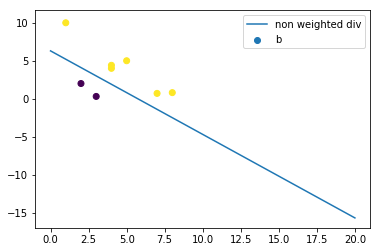

In [211]:
w = svclassifier.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,20)
yy = a * xx - svclassifier.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, '-', label="non weighted div")
plt.scatter(data.iloc[:,0], data.iloc[:,1],c=result)
plt.legend()
plt.show()

In [50]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

NameError: name 'cv' is not defined